# Drawbacks of K-Means and Remedies

## 1. Sensitive to Initial Centroids
- **Issue**: K-Means is sensitive to the initial choice of centroids, which can lead to suboptimal clustering.
- **Remedy**: Use **K-Means++** initialization to smartly choose initial centroids, improving cluster quality.

## 2. Requires Predefined K
- **Issue**: The number of clusters (K) must be predefined, which can be challenging.
- **Remedy**: Use the **Elbow Method** to determine the optimal value of K.

## 3. Cannot Handle Non-Spherical Clusters
- **Issue**: K-Means assumes spherical clusters, which limits its applicability for clusters of arbitrary shape.
- **Remedy**: Use **Density-Based Clustering** methods like **DBSCAN** that can handle non-spherical clusters.

## 4. Sensitive to Outliers
- **Issue**: Outliers can significantly affect the K-Means algorithm, leading to inaccurate clustering.
- **Remedy**: Preprocess data to remove outliers or use **robust clustering methods**.

---

# Cluster Quality Measures

- **Within-Cluster Homogeneity (HM)**: Measures the similarity of points within a cluster.
- **Within-Cluster Heterogeneity (HT)**: Measures the dissimilarity between points within a cluster.

### Goal:
- **Reduce Heterogeneity (HT)** and **Increase Homogeneity (HM)** to ensure better-defined clusters.

---

# Choosing the Appropriate Number of Clusters

## 1. For Small Data:
Use the formula:  
\[ K = \sqrt{\frac{n}{2}} \]
where **n** is the number of data points.

---

# Elbow Method

The **Elbow Method** helps determine the optimal number of clusters (K) by finding the point where the rate of decrease in the sum of squared errors (SSE) slows down.

- **Underfitting**: Too few clusters (K is small).
- **Overfitting**: Too many clusters (K is large).
- **Optimal K**: The value where SSE starts to level off (the "elbow" point).

As K increases:
- Homogeneity increases.
- Heterogeneity decreases.

After the elbow point, further increases in K lead to diminishing returns in reducing HT.

---

# Choosing Initial Centroids

- **Issue**: Random selection of centroids often results in high Sum of Squared Errors (SSE), leading to suboptimal clustering.
- **Remedy**: Apply **Hierarchical Clustering** on a sample to determine initial centroids. This can work well when K is small relative to the number of data points.

---

# Euclidean Distance

The distance between a point \( x \) and a centroid \( c \) is calculated as:

\[
\text{dist}(x, c) = \sqrt{\sum_{i=1}^{n} (s_i - c_i)^2}
\]

where \( s_i \) and \( c_i \) are the coordinates of point \( x \) and centroid \( c \), respectively.

---

# Quality of Clustering

The quality of clustering is typically measured by the **Sum of Squared Errors (SSE)**:

\[
SSE = \sum_{i=1}^{N} \sum_{k=1}^{K} \text{dist}(x_i, c_k)^2
\]

Where:
- **N**: Total number of data points
- **K**: Number of clusters
- **x_i**: A data point
- **c_k**: Centroid of cluster(k)

- **Lower SSE**: Indicates better centroid positioning.
- **Centroid Minimizing SSE**: The centroid of a cluster is the mean of the points within that cluster.
- **SSE is sensitive to outliers**: Outliers can disproportionately affect SSE, leading to poor clustering.

---

# K-Means Variants

## 1. K-Medoids: A Representative Object-Based Clustering

- **Concept**: Unlike K-Means, which uses the mean as the centroid, **K-Medoids** uses actual data points as cluster representatives (medoids).
- **Advantages**: More robust to outliers since it doesn't use the mean to define the center.

### K-Medoids vs K-Means

| Property                | K-Means                      | K-Medoids                   |
|-------------------------|------------------------------|-----------------------------|
| **Centroid**            | Mean of points               | Medoid (actual data point)  |
| **Sensitivity to Outliers** | Sensitive to outliers       | Robust to outliers          |
| **Speed**               | Fast                         | Slower (expensive)          |

### Partitioning Around Medoids (PAM) Algorithm

1. **Initialize**: Randomly select K data points as initial medoids.
2. **Assign**: Assign each remaining point to the nearest medoid.
3. **Swap**: For each cluster, randomly select a non-medoid point and swap it with the current medoid.
4. **Recalculate SSE**: If the new SSE is lower, keep the swap and reassign points to the nearest medoid.
5. **Repeat**: Continue until no improvement in SSE is observed.

- **Complexity**: ( O(K times (n - K)^2) ) per iteration. PAM is computationally expensive compared to K-Means for large datasets.

---

# Complexity of K-Means

The complexity of the K-Means algorithm is:

O(nKt)

Where:
- **n**: Number of data points
- **K**: Number of clusters
- **t**: Number of iterations

---

# Use Case: Software Defects

- **Clustering**: Identifying subgroups of defects within software.
- **Classification**: Assigning new defects to these subgroups for better management and prioritization.

---

# Conclusion

- **K-Means** is efficient but sensitive to initial conditions and outliers.
- **K-Medoids** offers robustness at the cost of higher computational expense.
- Selecting the optimal K and properly initializing centroids are crucial for obtaining meaningful results.


# Practical Implemention of Elbow Method

In [6]:
import numpy as np
import numpy as np

X = np.random.randint(0, 10, size=(10, 2))
print(x)

[[2 6]
 [4 7]
 [7 6]
 [7 6]
 [8 1]
 [5 9]
 [8 5]
 [2 2]
 [1 7]
 [3 6]]


/home/iteradmin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/iteradmin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/iteradmin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/iteradmin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

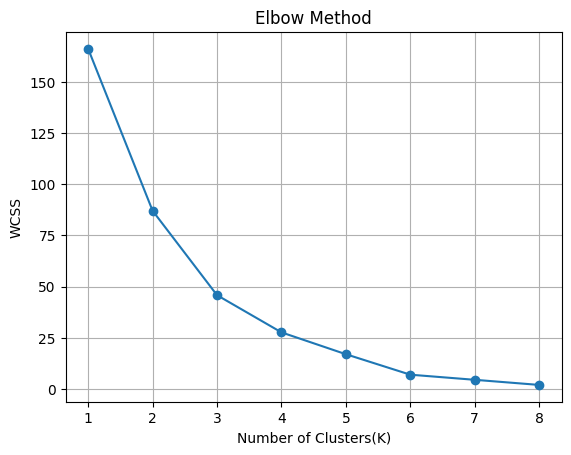

In [5]:
'''Elbow Method for Optimal K'''
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,9):
    km=KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)# Calculates SSE

plt.plot(range(1,9),wcss,marker='o')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.grid(True)
plt.show()